In [116]:
import plotly.express as px
import matplotlib.pyplot as plt
import pandas as pd

In [128]:
playlist_data = [
    '1950.csv',
    '1970.csv',
    '1990.csv',
    '2010.csv'
]

In [118]:
def plot_graph(file):
    playlist = pd.read_csv(f'{file}')

    data = {
        'danceability': [playlist['danceability'].mean()],
        'energy': [playlist['energy'].mean()],
        'loudness': [(60 - abs(playlist['loudness'].mean())) / 100],
        'acousticness': [playlist['acousticness'].mean()],
        'liveness': [playlist['liveness'].mean()],
        'valence': [playlist['valence'].mean()],
        'tempo': [playlist['tempo'].mean() / 1000],
        'duration_ms': [playlist['duration_ms'].mean() / 1000000],
    }

    fig = px.line_polar(data, r=[item[0] for item in data.values()], theta=data.keys(),
                        range_r=[0.0, 1.0], line_close=True,
                        title=f'Audio features of {file}',
                        width=600, height=500)

    # year = file.replace('.csv', '')
    # fig.write_image(f'polar_plots/{year}.png')
    fig.show()

In [143]:
def plot_pie(file, param):
    playlist = pd.read_csv(f'{file}')

    year = file.replace('.csv', '')
    plot = playlist[param].value_counts().plot.pie(y=param, figsize=(7, 7), title=year)
    plt.savefig(f'{param}/{param}_{year}.png')
    plt.show(plot)

In [144]:
for file in playlist_data:
    plot_graph(file)

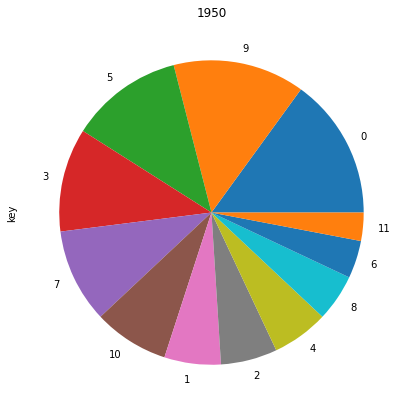

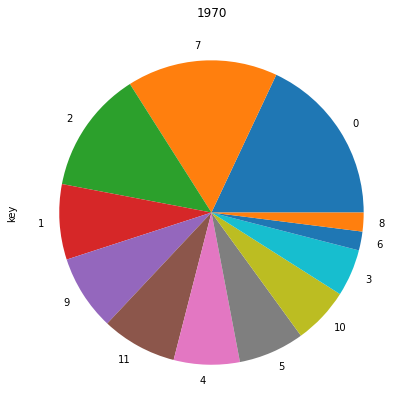

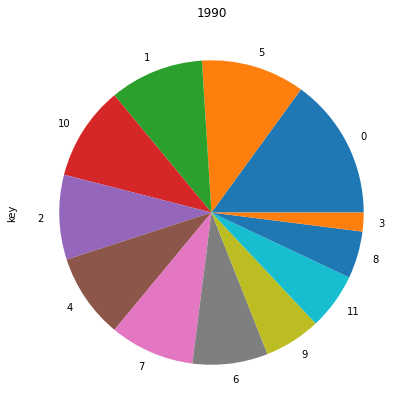

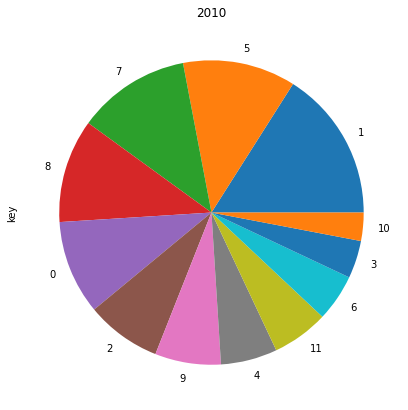

In [145]:
for file in playlist_data:
    plot_pie(file, 'key')

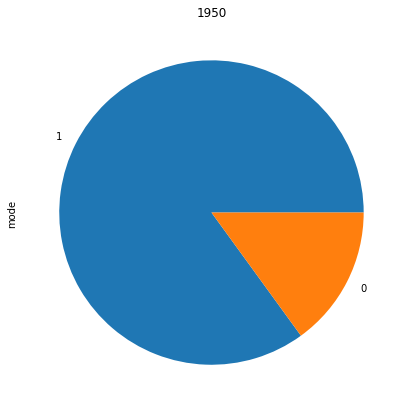

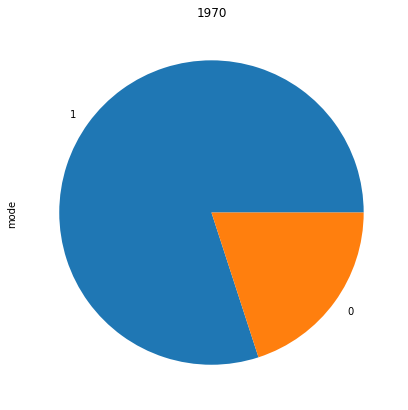

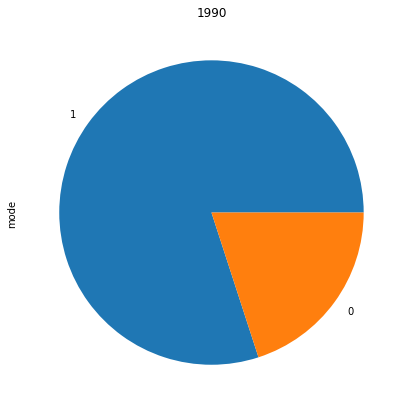

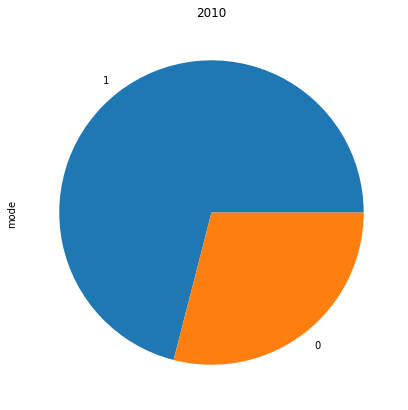

In [146]:
for file in playlist_data:
    plot_pie(file, 'mode')

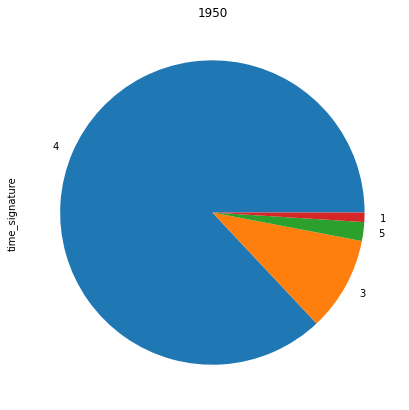

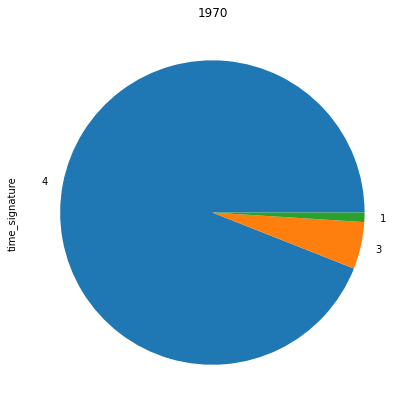

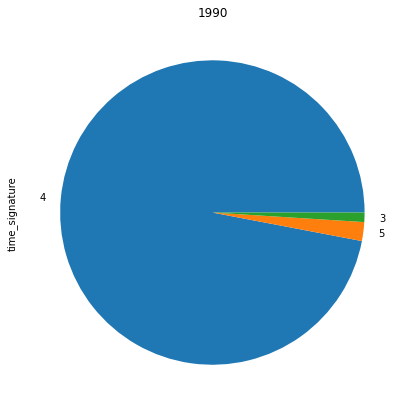

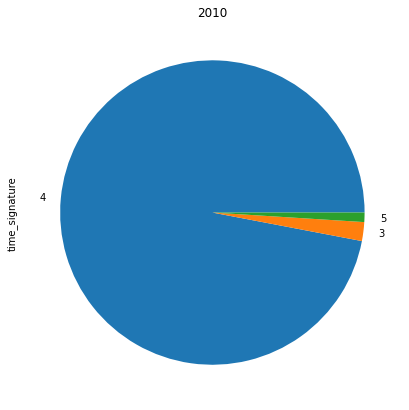

In [147]:
for file in playlist_data:
    plot_pie(file, 'time_signature')